# `chart_ipynb` quick reference

`chart_ipynb` is designed to present data on Jupyter interface more easily. It works as [`Chart.js`](https://www.chartjs.org/samples/latest/) which is a JavaScript module but can be achieved nicely for Python user on Jupyter interface.

There are several chart options, not as many as in `chart.js`, however, more charts will be available gradually. 

- line chart  
- bar chart  
- scatter chart  
- doughnut chart  
- pie chart   
- radar chart  
- polar area chart  
- bubble chart

<br>

## Import `chart_ipynb`

`chart_ipynb` provides multi classes. `line`, `bar`, `radar`, and `polarArea` are for each type of charts, `utils` contains several helper functions for property customization, and `time_series` provides a more convenient method to visual time-series data.

In [2]:
from chart_ipynb import utils, time_series, line, bar, scatter, doughnut 
from chart_ipynb import pie, radar, polarArea, bubble
import random

## Line Chart  

Line chart is one of the fundamental charts for data visualization. It is useful for showing the information between categorical data and numeric data. In `chart_ipynb`, we can customize the options for line type, potins, and other property. For the following example, default option will be used.    

- `add_dataset` function accepts a list of data as input data.  
  ```
    add_dataset(data_x, data_y, dataset_name, color = None, 
                 backgroundColor = None, borderColor = None, 
                 fill = False,
                 **other_arguments,)
  ```
  - `data_x`:  the label which is x axis for the data; categorical data   
  - `data_y`:  numeric data, y axis  
  - `dataset_name`:  the name of the dataset for legend  
  - `color`:  random color will be generated if the value is None.
 
 
- `setup()` is to initialize the chart setting by fitting data and options to configuration of the chart.
    ```
    setup(width=800, **other_arguments)
    ```
  - `width`: default is 800
  
Three datasets have been created randomly below. If you only want to see one or two of three datasets, you can click the legend retangle of the dataset you want to remove to hide the data.   

The js example can refer to https://www.chartjs.org/samples/latest/charts/line/basic.html

<img src="pics/lineC.png" width="80%">

In [13]:
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
colors = ['forestgreen', 'midnightblue', 'orange']
line_chart = line.Line()
for i in range(3):
    data = [round(random.random() * 100) for i in range(len(labels))]
    line_chart.add_dataset(labels, data, 'dataset'+str(i+1), color=colors[i])
line_chart.setup()
line_chart

Line(status='deferring flush until render')

### Line Chart - Multi Axis  

The default options in line chart do not consider multi axis option, therefore, creating multi-axis line chart requires some customized options.   
Multi-aixs line chart only requires two datasets.   
`time_series.py` in `chart_ipynb` provides default options for multi-axis setting by setting `multi_axis=True`.    
```
ts_default_option(xAxes = None, yAxes = None, 
                       xAxes_name = None, yAxes_name = None,
                       multi_axis = False, multi_axis_name = None,
                       stacked = False, title = None)
```
To show how multi-axis works more clearly, the following codes specify some basic properties required by the multi-aixs chart.    

`type='linear'` and `id = 'xxx'` are required for y axes, when you add dataset, you also need to emphasize the y axis id by setting `yAxisID = 'xxx'` for corresponding dataset.   

The js example can refer to https://www.chartjs.org/samples/latest/charts/line/multi-axis.html  

<img src="pics/lineC_multi.png" width="80%">

In [3]:
x_axes = utils.axes(
                display=True,
                scaleLabel = dict(display = True, labelString = 'Activity'),
                ticks = dict(
                    major = {
                            'enabled': True,
                            'fontStyle': 'bold'
                            },
                    source = 'data'
                ))
y_axes = [utils.axes(
                    display = True,
                    scaleLabel = {
                        'display': True,
                        'labelString': 'dataset1'
                        },
                    type = 'linear',
                    position = 'left',
                    id = 'y-axis-1',
                    gridLines = {
                        'drawBorder': False
                    }
                ), utils.axes(
                    display = True,
                    scaleLabel = {
                        'display': True,
                        'labelString': 'dataset2'
                        },
                    type = 'linear',
                    position = 'right',
                    id = 'y-axis-2',
                    gridLines = {
                        'drawBorder': False,
                        'drawOnChartArea': False
                    }
                )]
options = utils.options(
                        responsive=True,
                        title=dict(display=True, text='Line Chart - Multi Axis'),
                        animation = dict(duration=0),
                        scales = { 'xAxes': x_axes, 'yAxes': y_axes}
                )
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']

In [4]:
line_multi = line.Line(options = options)
for i in range(2):
    data = [round(random.random() * 100) for i in range(len(labels))]
    line_multi.add_dataset(labels, data, 'dataset'+str(i+1),
                        yAxisID = 'y-axis-'+str(i+1))
line_multi.setup()
line_multi

Line(status='deferring flush until render')

## Bar Chart   

Bar chart works similarly as line chart in `chart_ipynb`.  
The js example can refer to https://www.chartjs.org/samples/latest/charts/bar/vertical.html  

<img src="pics/barC.png" width="70%">

In [5]:
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
bar_chart = bar.Bar()
for i in range(3):
    data = [round(random.random() * 100) for i in range(len(labels))]
    bar_chart.add_dataset(labels, data, 'dataset'+str(i+1))
bar_chart.setup()
bar_chart

Bar(status='deferring flush until render')

### Bar Chart - Stacked  

Bar chart also provides `stacked` option when initializing by setting `stacked = True`.  

The js example can refer to https://www.chartjs.org/samples/latest/charts/bar/stacked.html

<img src="../pics/barC_stacked.png" width=70%>

In [6]:
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
bar_stacked = bar.Bar(stacked=True, title = 'Bar Chart - Stacked')
for i in range(3):
    data = [round(random.random() * 100) for i in range(len(labels))]
    bar_stacked.add_dataset(labels, data, 'dataset'+str(i+1))
bar_stacked.setup()
bar_stacked

Bar(status='deferring flush until render')

## Scatter Chart  

The axes of scatter charts are numeric, so there is no argument called labels in the `add` and `add_dataset` function. The input data should be indicated `x` and `y` axis in a list of dictionary structure.  
Also, if you want to modify the radius of points, you can update the options dictionary by `scatter_chart.options.update({'elements':{'point':{'radius':5}}})` as below example.  

The js example can refer to https://www.chartjs.org/samples/latest/charts/scatter/basic.html

<img src="pics/scatterC.png" width="70%">

In [7]:
scatter_chart = scatter.Scatter()
colors = ['red', 'blue']
for i in range(2):
    data = []
    for j in range(6):
        x = round(random.random() * 100)
        y = round(random.random() * 100)
        data.append({'x': x,'y': y})
    scatter_chart.add_dataset(data, 'dataset'+str(i+1), color = utils.color_rgb(colors[i]))
scatter_chart.options.update({'elements':{'point':{'radius':5}}})
scatter_chart.setup()
scatter_chart

Scatter(status='deferring flush until render')

## Doughnut Chart

Doughnut chart is not suitable for multi datasets. It indicates the proportion of a single data among all data addded.  

You can either add a single data at a time or a whole dataset.   
- `add` function is used to add a single data  
    ```
    add(label, datum, color)
    ```
    - label: the name of the dataset  
    - datum: a number (single data)  
    - color: the color for the area of a single data  
- `get_ready_data` function can be used when you want more properties added to the dataset   
    ```
    get_ready_data(label, backgroundColor=None, borderColor=None, fill = False, **other_arguments)
    ```  
    
The js example can refer to https://www.chartjs.org/samples/latest/charts/doughnut.html

<img src="pics/doughnutC.png" width="70%">

In [10]:
doughnut_chart = doughnut.Doughnut()
doughnut_chart.set_title("Chocolate Frosted")
doughnut_chart.add("Big", 10, "brown")
doughnut_chart.add("Medium", 7, "pink")
doughnut_chart.add("Small", 3, "purple")
doughnut_chart.setup()
doughnut_chart

Doughnut(status='deferring flush until render')

## Pie Chart

Pie chart can accept both single dataset and multi datasets.  

The js example can refer to https://www.chartjs.org/samples/latest/charts/pie.html

### Single dataset  

<img src="pics/pieC_single.png" width="70%">

In [9]:
pie_chart = pie.Pie()
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
colors = ['red', 'blue', 'green', 'cyan', 'pink', 'violet', 'purple']
data = [round(random.random() * 100) for i in range(len(labels))]
pie_chart.add_dataset(labels, data, 'dataset',
                            backgroundColor = [utils.color_rgb(i,0.1) for i in colors],
                            borderColor = [utils.color_rgb(i) for i in colors])
pie_chart.set_title('Pie Chart - single dataset')
pie_chart.setup()
pie_chart

Pie(status='deferring flush until render')

### Multi datasets  

<img src="pics/pieC_multi.png" width="70%">

In [10]:
pie_chart = pie.Pie()
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
colors = ['red', 'blue', 'green', 'cyan', 'pink', 'violet', 'purple']
for k in range(3):
    data = [round(random.random() * 100) for i in range(len(labels))]
    pie_chart.add_dataset(labels, data, 'dataset'+str(k+1),
                                backgroundColor = [utils.color_rgb(i,0.5) for i in colors],
                                borderColor = 'white')
pie_chart.set_title('Pie Chart - three datasets')
pie_chart.setup()
pie_chart

Pie(status='deferring flush until render')

### Toggle Doughnut View  

`cutoutPercentage = value` in the options can be used to toggle doughnut view of pie chart. The value is to control the percentage of cutout from the center of pie. The following example set cutoutPercentage to 30.

The js example can refer to https://www.chartjs.org/samples/latest/scriptable/pie.html

<img src="pics/pieC_doughnut.png" width="70%">

In [11]:
pie_chart = pie.Pie()
labels = [ 'Coding', 'Cycling', 'Running']
colors = ['blue', 'green','violet']
data = [30, 15, 20]
pie_chart.add_dataset(labels, data, 'dataset',
                            backgroundColor = [utils.color_rgb(i,0.1) for i in colors],
                            borderColor = [utils.color_rgb(i) for i in colors])
pie_chart.set_title('Pie Chart - doughnut view')
pie_chart.options['cutoutPercentage'] = 30
pie_chart.setup()
pie_chart

Pie(status='deferring flush until render')

## Radar Chart   

Radar chart works similarly as line chart and bar chart. If you want to fill the background color, you need to set `fill` option to be true.   

The js example can refer to https://www.chartjs.org/samples/latest/charts/radar.html

<img src="pics/radarC.png" width="70%">

In [12]:
radar_chart = radar.Radar()
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
colors = ['red', 'blue', 'green']
for i in range(3):
    data = [round(random.random() * 100) for i in range(len(labels))]
    radar_chart.add_dataset(labels, data, 'dataset'+str(i+1),
                            backgroundColor = utils.color_rgb(colors[i],0.1),
                            borderColor = utils.color_rgb(colors[i]),
                            pointBackgroundColor = utils.color_rgb(colors[i]),
                            fill=True)
radar_chart.setup()
radar_chart

Radar(status='deferring flush until render')

## Polar Area Chart  

Polar area chart is not suitable for multi datasets. You can either add a single data at a time or a whole dataset.   
- `add` function is used to add a single data  
    ```
    add(label, datum, color)
    ```
    - label: the name of the dataset  
    - datum: a number (single data)  
    - color: the color for the area of a single data  
- `get_ready_data` function can be used when you want more properties added to the dataset   
    ```
    get_ready_data(label, backgroundColor=None, borderColor=None, fill = False, **other_arguments)
    ```
    
The js example can refer to https://www.chartjs.org/samples/latest/charts/polar-area.html

<img src="pics/polarArea.png" width="70%">

In [13]:
polarArea_chart = polarArea.PolarArea()
label_polar = ['Coding', 'Cycling', 'Running']
colors = ['red', 'green', 'blue']
for i in range(3):
    polarArea_chart.add(label = label_polar[i], 
                        datum = round(random.random() * 100), 
                        color = utils.color_rgb(colors[i],0.5))
polarArea_chart.get_ready_data('activity')
polarArea_chart.setup()
polarArea_chart

PolarArea(status='deferring flush until render')

## Bubble Chart  

Bubble chart and scatter chart are very similar. There are several more properties we can define for bubble chart, such as `hoverBackgroundColor`, `hoverBorderColor`, and `hoverBorderWidth`. You can also customize raidus of potins based on values.  

The js example can refer to https://www.chartjs.org/samples/latest/scriptable/bubble.html

<img src="pics/bubbleC.png" width="70%">  

The following cells define minimum value and maximum value that x and y can be generated. 

In [14]:
import numpy as np

n = 16
min_val = 0
max_val = 150
import numpy as np

We define `borderWidth` and `hoverBorderWidth` based on the value `v` which is also generated randomly. The radius of the points will be normalized based on x and y.   
These properties can be done in options setting as elements point setting in Chart.js, however, on Jupyter interface, predefining the values before initializing the chart avoids the failure of communication between Python and JavaScript. 

In [15]:
bubble_chart = bubble.Bubble()
colors = ['red', 'blue']
for i in range(2):
    data = []
    borderWidth = []
    hoverBorderWidth = []
    radius = []
    for j in range(n):
        x = round(min_val + np.random.random()*max_val,2)
        y = round(min_val + np.random.random()*max_val,2)
        v = np.random.random()*1000
        data.append({'x': x,'y': y})
        borderWidth.append(abs(v) / 1000)
        hoverBorderWidth.append(round(8*v / 1000))
        radius.append(abs(10 + 10 * x / (max_val-min_val)))
    bubble_chart.add_dataset(data, 'dataset'+str(i+1), 
                              backgroundColor = utils.color_rgb(colors[i], 0.5),
                              borderColor = utils.color_rgb(colors[i]),
                              borderWidth = borderWidth,
                              hoverBackgroundColor = 'transparent',
                              hoverBorderColor = utils.color_rgb(colors[i]),
                              hoverBorderWidth = hoverBorderWidth,
                              radius = radius
                             )
bubble_chart.setup()
bubble_chart

Bubble(status='deferring flush until render')

## Other Features

### Helper Functions  

`utils` provides several helper functions to set up options, axes, scales, data, dataset, colors, and config. 

### Time Series  

`time_series` provides quick inistialization of line and bar charts for time series data. More details about it can refer to the [example](https://github.com/AaronWatters/Chart_ipynb/blob/master/notebooks/time%20series%20example.ipynb).  


### Point Style  

You can specify `pointStyle` to change the shape of points when creating a dataset.   
- 'circle'  
- 'triangle'  
- 'rect'  
- 'rectRounded'  
- 'rectRot'  
- 'cross'  
- 'crossRot'  
- 'line'  
- 'dash'

You can also change other point setting by specifying `pointRadius`, `pointHoverRadius` and `pointHitRadius`.

In [6]:
scatter_chart = scatter.Scatter()
colors = ['red', 'blue']
pts = ['rectRounded', 'crossRot']
for i in range(2):
    data = []
    for j in range(6):
        x = round(random.random() * 100)
        y = round(random.random() * 100)
        data.append({'x': x,'y': y})
    scatter_chart.add_dataset(data, 'dataset'+str(i+1), 
                              color = utils.color_rgb(colors[i]),
                              pointStyle = pts[i])
scatter_chart.setup()
scatter_chart

Scatter(status='deferring flush until render')

In the legend, if you would like legend style to be the same as the point style, you can update legend setting as the following example. 

```
scatter_chart.options['legend'].update({
                                'labels':{'usePointStyle':True}
                                    })
```

In [14]:
scatter_chart = scatter.Scatter()
colors = ['red', 'blue']
pts = ['rectRounded', 'crossRot']
for i in range(2):
    data = []
    for j in range(6):
        x = round(random.random() * 100)
        y = round(random.random() * 100)
        data.append({'x': x,'y': y})
    scatter_chart.add_dataset(data, 'dataset'+str(i+1), 
                              color = utils.color_rgb(colors[i]),
                              pointStyle = pts[i])
    
scatter_chart.options['legend'].update({
                                'labels':{'usePointStyle':True}
                                    })
scatter_chart.setup()
scatter_chart

Scatter(status='deferring flush until render')

### Line Style  

By specifying `fill` and `borderDash`, you can change the style of line.  
- `fill`: fill the area below the line and above zero or above the line and below zero.  
- `borderDash`: change to dash line.  

In [16]:
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
colors = ['forestgreen', 'midnightblue', 'orange']

line_chart = line.Line()
# unfill
data = [round(random.random() * 100) for i in range(len(labels))]
line_chart.add_dataset(labels, data, 'unfill', color=colors[0],
                          )
# fill
data = [round(random.random() * 100) for i in range(len(labels))]
line_chart.add_dataset(labels, data, 'fill', color=colors[1],
                          fill=True)

# dash
data = [round(random.random() * 100) for i in range(len(labels))]
line_chart.add_dataset(labels, data, 'dash', color=colors[2],
                          borderDash = [4,4])

line_chart.setup()
line_chart

Line(status='deferring flush until render')

### Options Update  

#### Title Update  

Before setup, you can change the title of chart by calling `set_title`. 

In [22]:
pie_chart = pie.Pie()
labels = [ 'Coding', 'Cycling', 'Running']
colors = ['blue', 'green','violet']
data = [30, 15, 20]
pie_chart.add_dataset(labels, data, 'dataset',
                            backgroundColor = [utils.color_rgb(i,0.1) for i in colors],
                            borderColor = [utils.color_rgb(i) for i in colors])
pie_chart.set_title('Change Title')
pie_chart.setup()
pie_chart

Pie(status='deferring flush until render')

#### Axis Type Update

In `chart_ipynb`, before final setup of the chart, you can update the axis type in options by call `update_axis_type`.

In [14]:
labels = [['Eating', 'Dinner'], ['Drinking', 'Water'], 
          'Sleeping', ['Designing', 'Graphics'], 
          'Coding', 'Cycling', 'Running']
colors = ['red', 'blue', 'green']
line_chart = line.Line()
data = [10**i for i in range(len(labels))]
line_chart.add_dataset(labels, data, 'dataset', color='midnightblue')

The chart object will use default options setting if no options input.

In [15]:
line_chart.options

{'responsive': True,
 'legend': {'position': 'top'},
 'title': {'display': True, 'text': 'Line Chart'},
 'animation': {'animateScale': True, 'animateRotate': True},
 'scales': {'xAxes': [{'display': True,
    'scaleLabel': {'display': True, 'labelString': 'x'},
    'stacked': False}],
  'yAxes': [{'display': True,
    'scaleLabel': {'display': True, 'labelString': 'y'},
    'stacked': False}]}}

We can update the type of axis by calling `update_axis_type(axis_position, axis_type)`.   
- axis_position: 'x' for x axis; 'y' for y axis  
- axis_type: 'linear', 'category', 'logarithmic'.(the type of multi-axis must be 'linear')  

In [16]:
line_chart.update_axis_type('y', 'logarithmic')

In [17]:
line_chart.options

{'responsive': True,
 'legend': {'position': 'top'},
 'title': {'display': True, 'text': 'Line Chart'},
 'animation': {'animateScale': True, 'animateRotate': True},
 'scales': {'xAxes': [{'display': True,
    'scaleLabel': {'display': True, 'labelString': 'x'},
    'stacked': False}],
  'yAxes': [{'display': True,
    'scaleLabel': {'display': True, 'labelString': 'y'},
    'stacked': False,
    'type': 'logarithmic'}]}}

In [18]:
line_chart.set_title('Line Chart - y Log-Scale')
line_chart.setup()
line_chart

Line(status='deferring flush until render')

### Embed Image

`embed_image()` enables the chart fit the screen as a static image 

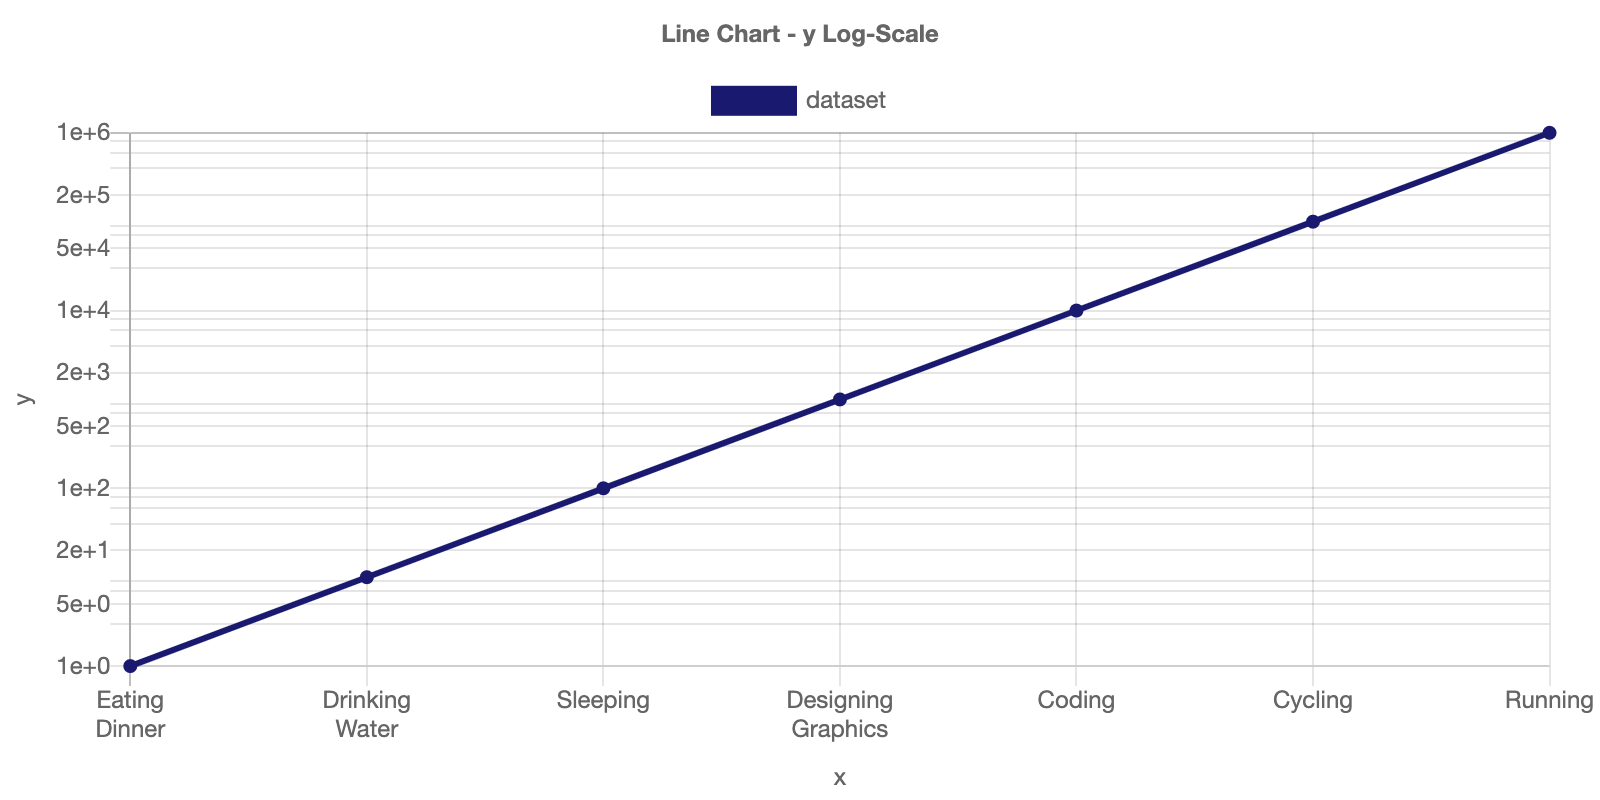

In [23]:
line_chart.embed_image()

### Save Image  

`save_image(path)` saves the chart as an image to the path specify.

In [24]:
line_chart.save_image('pics/save_image_example.png')